## Data Science Course
### Introduction 
#### Author: Pawel Jelonek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

## Exercise 1

#### a) Load house sales data from file kc_house_data.csv, print first records.  

In [2]:
hs_data = pd.read_csv("kc_house_data.csv")
hs_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### b) Print the variable list. Select categorical and numerical variables.  

In [3]:
house_categorical_df = hs_data.columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
house_numerical_df = hs_data.select_dtypes(include=np.number)
hs_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

#### c) Compute basic statistics of numerical variables. Are all of them meaningful?

In [4]:
include = {'bedrooms', 'bathrooms', 'sqft_living', 'price',
           'sqft_lot', 'floors','sqft_above', 'sqft_basement',
        'yr_built', 'yr_renovated','lat', 'long', 'sqft_living15', 'sqft_lot15'}
hs_data[include].describe()

,sqft_living,yr_renovated,sqft_lot,price,long,bedrooms,bathrooms,sqft_basement,floors,sqft_above,lat,sqft_living15,sqft_lot15,yr_built
count,21613.000000,21613.000000,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,2079.899736,84.402258,1.510697e+04,5.400881e+05,-122.213896,3.370842,2.114757,291.509045,1.494309,1788.390691,47.560053,1986.552492,12768.455652,1971.005136
std,918.440897,401.679240,4.142051e+04,3.671272e+05,0.140828,0.930062,0.770163,442.575043,0.539989,828.090978,0.138564,685.391304,27304.179631,29.373411
min,290.000000,0.000000,5.200000e+02,7.500000e+04,-122.519000,0.000000,0.000000,0.000000,1.000000,290.000000,47.155900,399.000000,651.000000,1900.000000
25%,1427.000000,0.000000,5.040000e+03,3.219500e+05,-122.328000,3.000000,1.750000,0.000000,1.000000,1190.000000,47.471000,1490.000000,5100.000000,1951.000000
50%,1910.000000,0.000000,7.618000e+03,4.500000e+05,-122.230000,3.000000,2.250000,0.000000,1.500000,1560.000000,47.571800,1840.000000,7620.000000,1975.000000
75%,2550.000000,0.000000,1.068800e+04,6.450000e+05,-122.125000,4.000000,2.500000,560.000000,2.000000,2210.000000,47.678000,2360.000000,10083.000000,1997.000000
max,13540.000000,2015.000000,1.651359e+06,7.700000e+06,-121.315000,33.000000,8.000000,4820.000000,3.500000,9410.000000,47.777600,6210.000000,871200.000000,2015.000000


## Exercise 2
#### Using scatter plot:  

#### a) Show the relation of square footage and price.  

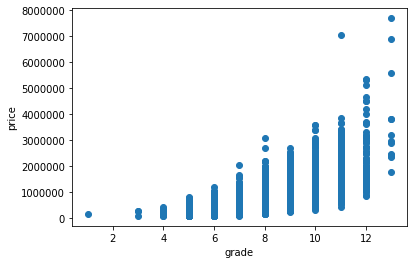

In [5]:
price_data = hs_data[{'price'}]
grade_data = hs_data[{'grade'}]
plt.scatter(grade_data,price_data)
plt.xlabel("grade")
plt.ylabel("price")
plt.show()

#### b) Check how price is influenced by apartment's grade. Find other variables correlated with price.  

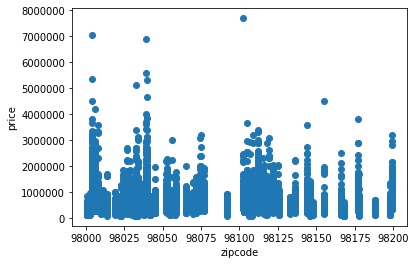

In [6]:
price_data = hs_data[{'price'}]
zipcode_data = hs_data[{'zipcode'}]
plt.scatter(zipcode_data,price_data)
plt.xlabel("zipcode")
plt.ylabel("price")
plt.show()

#### c) Check how good apartments are distributed over the city. First, plot zipcode versus price. Then, use apartments coordinates (longitude and lattitude) in order to show where apartments of good grade are located. 

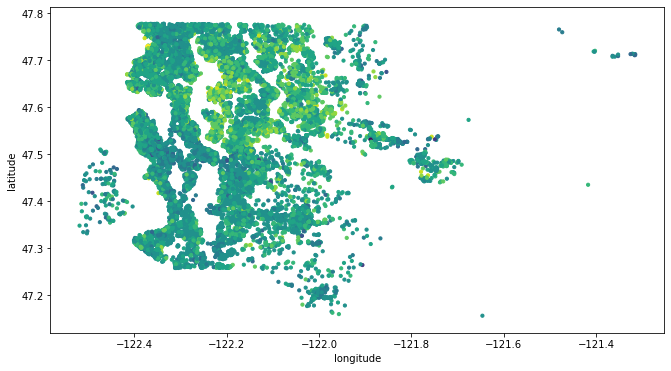

In [7]:
x = hs_data['long']
y = hs_data['lat']
grades = hs_data['grade']
plt.figure(figsize=(11,6))
plt.scatter(x,y,c = grades,s = 10)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

## Exercise 3

#### a) Create boxplot of apartment's grade versus it's price. Compare with plot 2b).  

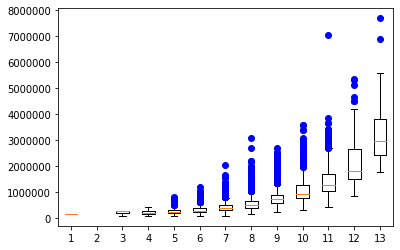

In [8]:
grades_data = []
grades_values = grades.sort_values().unique()
for i in range(1,14,1):
    grades_data.append(hs_data[hs_data['grade'] == i]['price'])   
blue_square = dict(markerfacecolor='b',markeredgecolor='b')
plt.boxplot(grades_data,flierprops=blue_square)
plt.show()

#### b) Create mosaic plot of any two categorical variables.

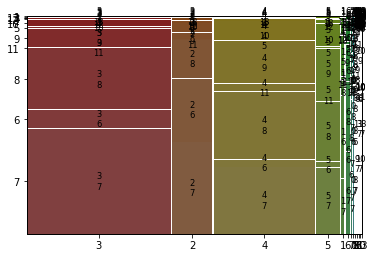

In [9]:
bedrooms = hs_data['bedrooms']
grade = hs_data['grade']
data = pd.DataFrame({'bedrooms': bedrooms, 'grade': grade})
mosaic(data,['bedrooms','grade'])
plt.show()

## Exercise 4
#### "I am interested in the house with 3 bedrooms, 2 bathrooms and 2 floors"

#### a) Compute the basic statistics of apartments fulfilling above constraints.  

In [10]:
data = hs_data.loc[(hs_data['bedrooms'] == 3)&(hs_data['bathrooms'] == 2)&(hs_data['floors'] == 2)]
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.540000e+02,1.540000e+02,154.0,154.0,154.000000,154.000000,154.0,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,4.397177e+09,5.144986e+05,3.0,2.0,1850.279221,23678.948052,2.0,0.006494,0.357143,3.435065,7.551948,1717.422078,132.857143,1969.779221,284.863636,98085.577922,47.567376,-122.247091,1802.337662,17545.123377
std,2.849813e+09,2.497661e+05,0.0,0.0,547.585413,83324.024708,0.0,0.080582,0.919495,0.713322,0.832684,527.473851,248.092631,34.654456,700.057328,48.808788,0.143221,0.150507,453.210930,40404.134611
min,7.600057e+06,2.090000e+05,3.0,2.0,1020.000000,700.000000,2.0,0.000000,0.000000,2.000000,6.000000,720.000000,0.000000,1900.000000,0.000000,98001.000000,47.194700,-122.519000,850.000000,886.000000
25%,2.060901e+09,3.769750e+05,3.0,2.0,1452.500000,3414.750000,2.0,0.000000,0.000000,3.000000,7.000000,1402.500000,0.000000,1942.250000,0.000000,98038.500000,47.498800,-122.361750,1452.500000,4020.000000
50%,3.630010e+09,4.640000e+05,3.0,2.0,1700.000000,5868.500000,2.0,0.000000,0.000000,3.000000,7.000000,1625.000000,0.000000,1984.500000,0.000000,98103.000000,47.584750,-122.299500,1725.000000,6278.000000
75%,7.184074e+09,5.894625e+05,3.0,2.0,2127.500000,10800.250000,2.0,0.000000,0.000000,4.000000,8.000000,1977.500000,207.500000,1997.500000,0.000000,98122.000000,47.682400,-122.149250,2117.500000,10392.250000
max,9.829200e+09,1.755000e+06,3.0,2.0,3650.000000,843309.000000,2.0,1.000000,4.000000,5.000000,10.000000,3650.000000,1120.000000,2014.000000,2014.000000,98199.000000,47.777000,-121.709000,3170.000000,273992.000000


#### b) Distinct accepted apartments on any of previously created plots.  

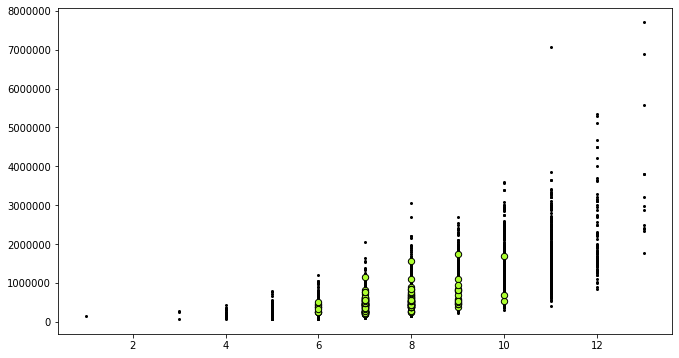

In [13]:
plt.figure(figsize=(11,6))
plt.scatter(hs_data['grade'],hs_data['price'],c='black',s=4)
plt.scatter(data['grade'],data['price'],c='greenyellow',s=40,edgecolors='black',linewidths=1)
plt.show()